In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline

In [4]:
df = pd.read_csv('data_project/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
len(df)

200

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

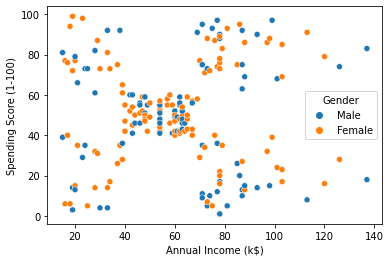

In [12]:
#Grafico de ingrresos anuales vs puntaje de gastos 
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Gender')

In [14]:
x = df.iloc[:,[3,4]].values

In [15]:
x[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means =KMeans(n_clusters =i, init='k-means++', random_state= 42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

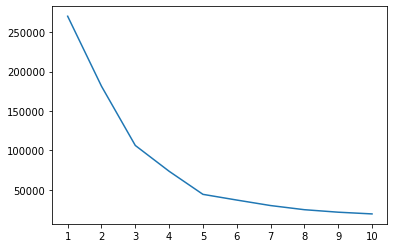

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));

In [19]:
kmeans =KMeans(n_clusters = 5, init='k-means++', n_init=10, max_iter =300, random_state=42)
ykmeans=kmeans.fit_predict(x)

In [20]:
ykmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [21]:
df2 = df
df2['ykmeans']= ykmeans

In [22]:
df2.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ykmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

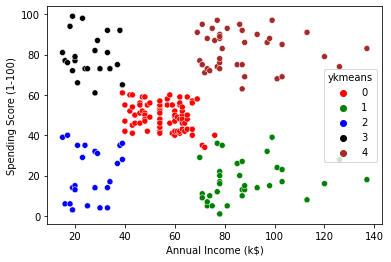

In [24]:
sns.scatterplot(x ='Annual Income (k$)', y='Spending Score (1-100)', data=df2, hue ='ykmeans', palette =['red','green','blue','black','brown'])


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from random import seed
sns.set_theme(style="white", palette =None)
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler


In [28]:
dataset = pd.read_csv('data_project/Mall_Customers.csv', index_col = False)
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
X = dataset.iloc[:,[3,4]].values

In [42]:
def kmeans(K, n_iter, dataset , rn=170):
    output ={}
    Centroids = []
    X=dataset
    m=X.shape[0]
    n=X.shape[1]
    
    seed(rn)
    for i in range(K):
        rand = random.randint(0,m-1)
        Centroids.append(X[rand])
    Centroids = np.array(Centroids).T
    for i in range(n_iter):
        EuclidianDistance = np.array([]).reshape(m,0)
        for k in range(K):
            tempDist = np.sum((X-Centroids[:,k])**2, axis =1)
            EuclidianDistance = np.c_[EuclidianDistance, tempDist]
            C=np.argmin(EuclidianDistance, axis = 1)+1
            Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        for k in range(K):
            Y[k+1]= Y[k+1].T
        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
        output =Y
    return Centroids, output
    

In [43]:
centroids , output = kmeans(5,100,X)


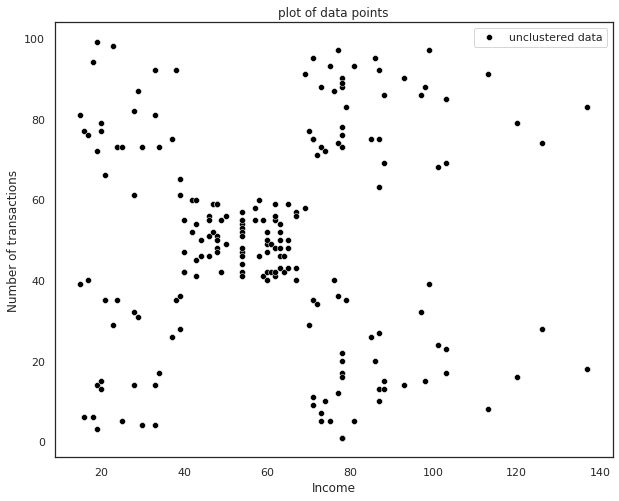

In [45]:
fig , ax = plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x =X[:,0], y=X[:,1], color ='black', label ='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('plot of data points')
plt.show()

In [46]:
def plot(Centroids, Output , K):
    labels = []
    for i in range(K):
        s = f'cluster{i+1}'
        labels.append(s)
    fig, ax= plt.subplots(1,1,figsize=(10,8))
    color =sns.color_palette(None, K)
    for k in range(K):
        sns.scatterplot(x =Output[k+1][:,0], y =Output[k+1][:,1],color =color[k], label= labels[k])
    sns.scatterplot(x=Centroids[0,:], y=Centroids[1,:],s=200, color='black', label ='Centroids', marker ='*')
    plt.xlabel('Income')
    plt.ylabel('Number of transactions')
    plt.legend()
    plt.show()

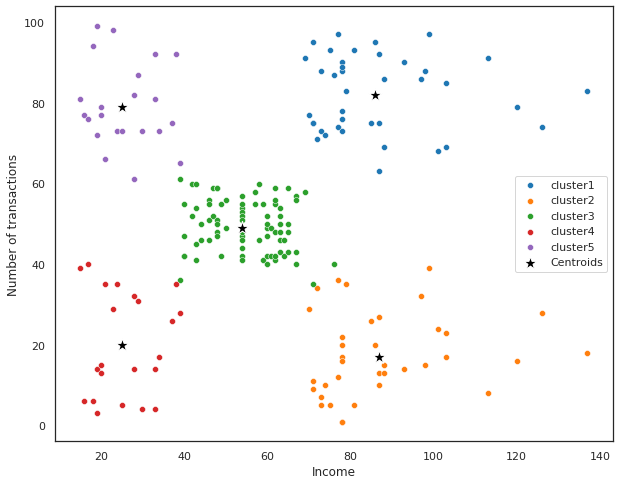

In [47]:
plot(centroids, output, 5)

# K-means with different values of k

In [48]:
centroids_for_different_k = []
clusters_for_different_k =[]
for i in range(1,11):
    Centroids, Clusters = kmeans(i,310,X)
    centroids_for_different_k.append(Centroids)
    clusters_for_different_k.append(Clusters)

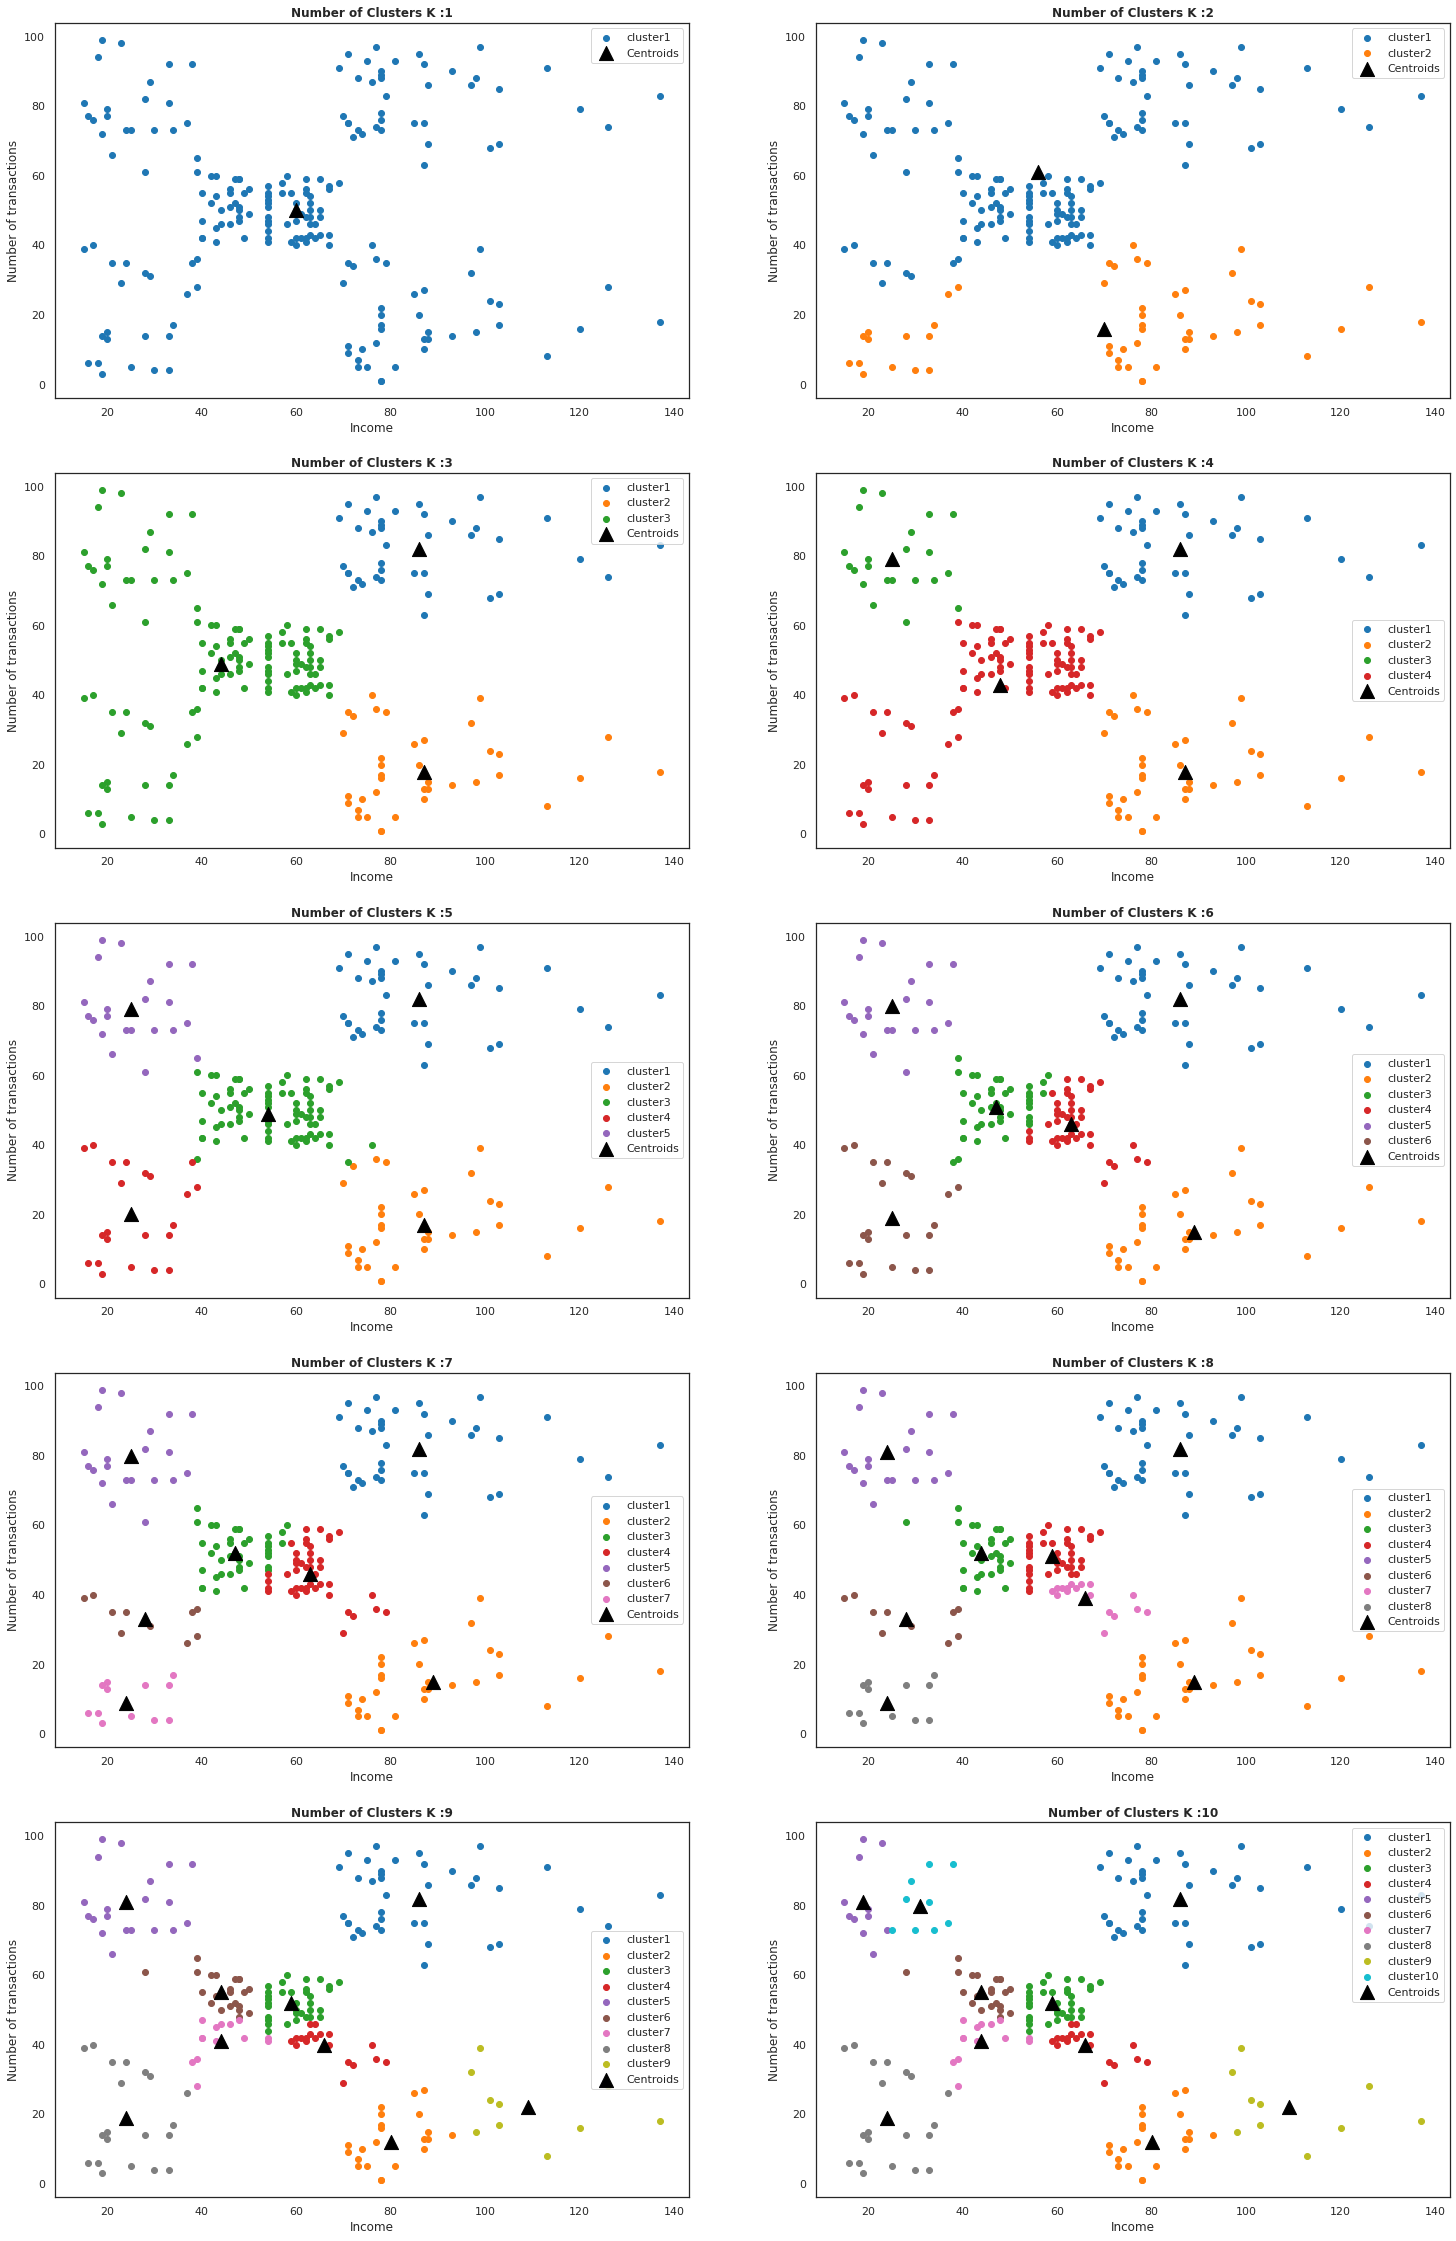

In [49]:
fig, ax = plt.subplots(5, 2, figsize=(25, 40))
k = 0;
for i in range (0, 5):
    for j in range (0, 2):
        labels=[]
        for z in range (k+1):
            s = f'cluster{z+1}'
            labels.append(s)
        color=sns.color_palette(None, k+1)
        for l in range(0, k+1):
            ax[i][j].scatter(x=clusters_for_different_k[k][l+1][:,0], y=clusters_for_different_k[k][l+1][:,1],color=color[l],label=labels[l])
            
        ax[i][j].scatter(x=centroids_for_different_k[k][0,:],y=centroids_for_different_k[k][1,:],s=200,color='black',label='Centroids', marker='^')
        ax[i][j].set_title(f"Number of Clusters K :{k+1}", fontweight='bold')
        ax[i][j].set_ylabel("Number of transactions")
        ax[i][j].set_xlabel( "Income")
        ax[i][j].legend()
        k=k+1

